# Elaborado por:
- David Betancur
- Nicolas Echeverri
- Santiago Toro

# <center> 1. Introducción a los Modelos Truncados </center>

En esta sección, exploraremos el concepto de **truncamiento** en modelos estadísticos y su diferencia con la **censura**. Estos conceptos son fundamentales para entender cómo manejar datos incompletos o restringidos en análisis estadísticos.

## <center>¿Qué es la truncación en modelos estadísticos?</center>

La **truncación** ocurre cuando solo observamos una parte de la distribución de una variable aleatoria, específicamente aquellos valores que caen dentro de un rango determinado. En otras palabras, los datos están "truncados" porque no tenemos información sobre los valores que están fuera de ese rango.

## <center>Diferencia entre censura y truncación</center>

Aunque la **censura** y la **truncación** son conceptos relacionados, tienen diferencias clave:

### Truncamiento
- **Definición**: Los datos fuera de un rango específico no se observan en absoluto.
- **Ejemplo**: Si solo tenemos datos de pacientes que permanecieron en el hospital más de 3 días, la muestra está truncada por debajo de 3 días.

### Censura
- **Definición**: Los datos fuera de un rango específico se observan, pero no se conocen sus valores exactos. En su lugar, se registran como un valor límite.
- **Ejemplo**: En un estudio sobre desempleo, si algunas personas aún no han encontrado trabajo al final del estudio, se registran como "desempleadas por más de X meses".

## <center>¿Para que usar truncamiento?</center>

El truncamiento en distribuciones de probabilidad es útil en muchas aplicaciones prácticas porque permite modelar fenómenos en los que ciertos valores extremos no son posibles o no tienen sentido en el contexto del problema. Una distribución truncada es una distribución de probabilidad en la que los *valores fuera de un cierto rango se eliminan o no se consideran*.

### Aplicaciones prácticas y casos reales
- Finanzas y economía
- Medicina y biología
- Procesamiento de imágenes y visión por computadora
- Ingeniería y manufactura

En resumen, las distribuciones truncadas permiten **modelar fenómenos de manera más realista cuando hay restricciones naturales o prácticas en los datos**, evitando sesgos o interpretaciones erróneas causadas por valores no plausibles.

## <center>Comparación visual</center>

Podemos visualizar la diferencia entre truncamiento y censura con un ejemplo gráfico.

### <center>Ejemplo 1 de truncamiento</center>

Supongamos que estamos estudiando los ingresos de una población, pero solo tenemos datos de personas cuyos ingresos superan un cierto umbral (por ejemplo, $50,000 al año). En este caso, la muestra está **truncada por debajo de $50,000**, ya que no tenemos información sobre las personas que ganan menos.

Matemáticamente, si \( Y \) es una variable aleatoria, decimos que está truncada por la izquierda en \( c \) si solo observamos \( Y \) cuando \( Y > c \).

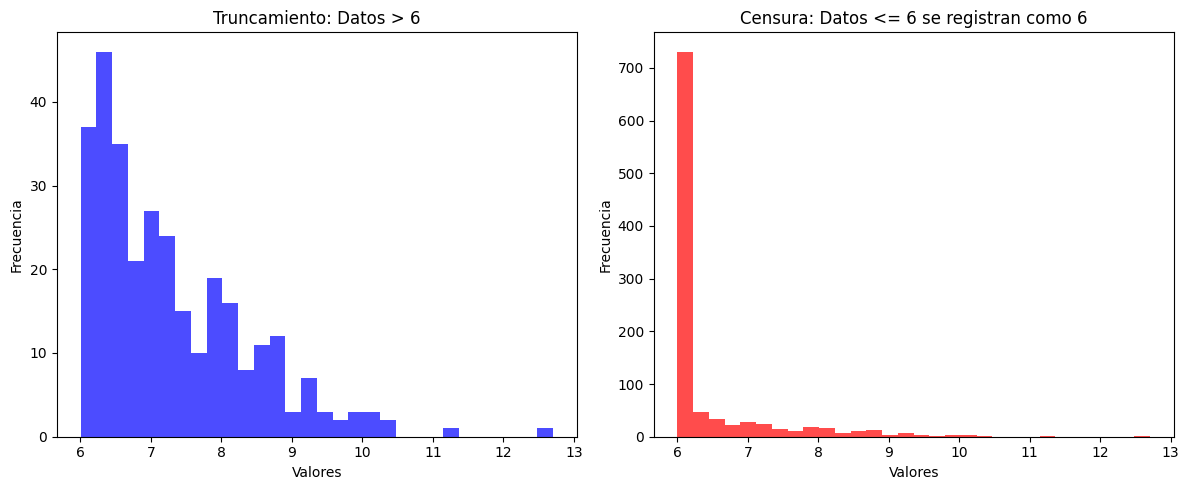

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
np.random.seed(42)
datos = np.random.normal(loc=5, scale=2, size=1000)

# Truncamiento: Solo datos mayores a 6
datos_truncados = datos[datos > 6]

# Censura: Datos mayores a 6 se registran como 6
datos_censurados = np.where(datos > 6, datos, 6)

# Gráficos
plt.figure(figsize=(12, 5))

# Gráfico de truncamiento
plt.subplot(1, 2, 1)
plt.hist(datos_truncados, bins=30, color='blue', alpha=0.7)
plt.title("Truncamiento: Datos > 6")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")

# Gráfico de censura
plt.subplot(1, 2, 2)
plt.hist(datos_censurados, bins=30, color='red', alpha=0.7)
plt.title("Censura: Datos <= 6 se registran como 6")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

### <center>Ejemplo 2 de truncamiento</center>

Estamos estudiando la edad de los estudiantes en una escuela. Supongamos que la edad de los estudiantes sigue una distribución normal con una media de 10 años y una desviación estándar de 2 años. Sin embargo, debido a ciertas restricciones, solo tenemos información parcial sobre las edades.

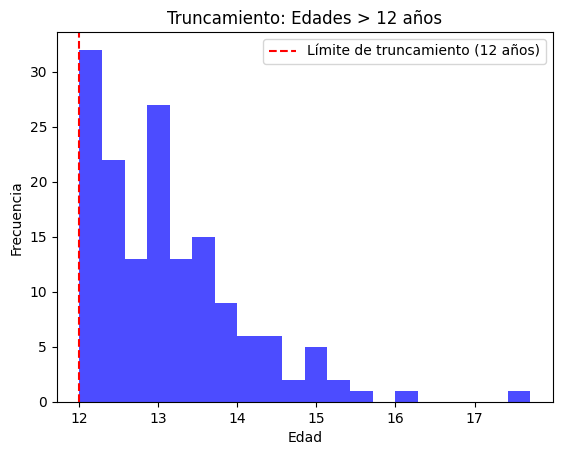

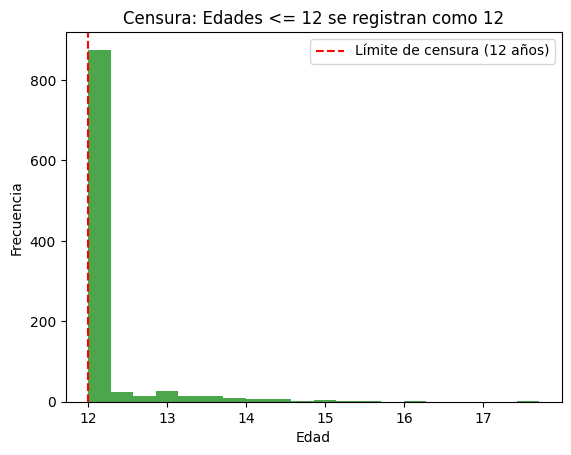

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo: edades de estudiantes
np.random.seed(42)
edades = np.random.normal(loc=10, scale=2, size=1000)

# Truncamiento: Solo edades mayores a 12
edades_truncadas = edades[edades > 12]

# Gráfico
plt.hist(edades_truncadas, bins=20, color='blue', alpha=0.7)
plt.title("Truncamiento: Edades > 12 años")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.axvline(12, color='red', linestyle='--', label="Límite de truncamiento (12 años)")
plt.legend()
plt.show()

edades_censuradas = np.where(edades <= 12, 12, edades)

# Gráfico
plt.hist(edades_censuradas, bins=20, color='green', alpha=0.7)
plt.title("Censura: Edades <= 12 se registran como 12")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.axvline(12, color='red', linestyle='--', label="Límite de censura (12 años)")
plt.legend()
plt.show()

## <center>Implicaciones del truncamiento</center>

El truncamiento puede llevar a estimaciones sesgadas si no se tiene en cuenta. Por ejemplo, si calculamos la media de una muestra truncada, es probable que la estimación esté sesgada porque no estamos considerando los valores fuera del rango de truncamiento.

### <center>Ejemplo numérico</center>

Veamos cómo el truncamiento afecta la media de una distribución normal.

In [11]:
# Media de la distribución original
media_original = np.mean(datos)
print(f"Media original: {media_original:.2f}")

# Media de la distribución truncada
media_truncada = np.mean(datos_truncados)
print(f"Media truncada (datos > 6): {media_truncada:.2f}")

Media original: 5.04
Media truncada (datos > 6): 7.29


## <center>Formalización matemática del truncamiento</center>

Matemáticamente, el truncamiento se puede expresar de la siguiente manera:

- **Truncamiento por la izquierda**: Solo observamos \( Y \) cuando \( Y > c \).
- **Truncamiento por la derecha**: Solo observamos \( Y \) cuando \( Y < d \).
- **Truncamiento bilateral**: Solo observamos \( Y \) cuando \( c < Y < d \).

La distribución de una variable truncada se ajusta utilizando técnicas como la **máxima verosimilitud**, que tiene en cuenta el rango de truncamiento para corregir el sesgo en las estimaciones.

### Tipos de Truncamiento

#### 1. *Truncamiento en valores absolutos*:
   - Se define un rango específico de valores (por ejemplo, [a, b]) y se descartan los valores fuera de ese rango.

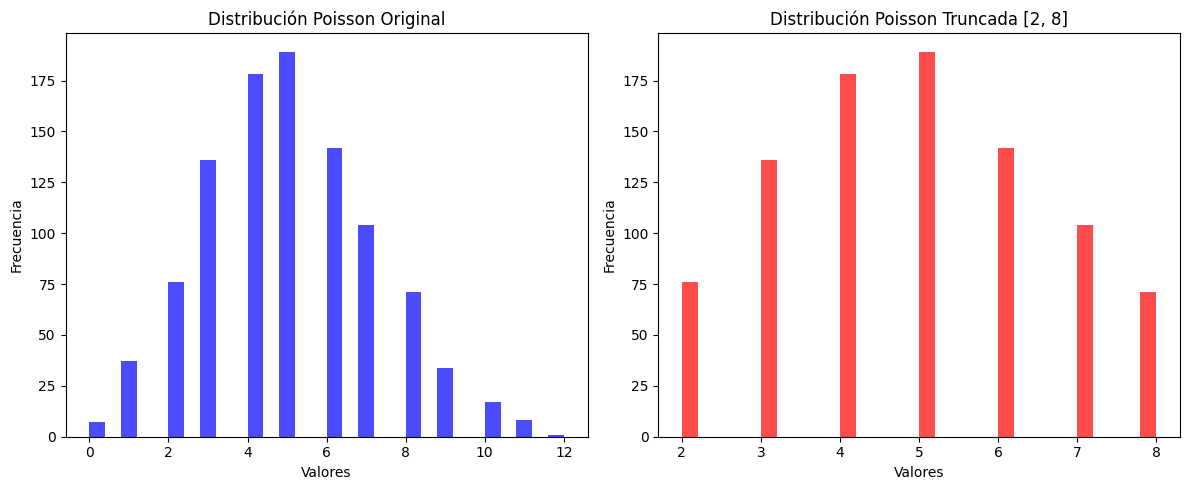

In [14]:
### Truncamiento en valores absolutos para una distribución discreta - Ejemplo con distribucion Poisson

from scipy.stats import poisson

# Generar datos de una distribución Poisson
datos_poisson = poisson.rvs(mu=5, size=1000)

# Truncar por debajo de 2 y por encima de 8
a_discreto = 2
b_discreto = 8
datos_poisson_truncados = datos_poisson[(datos_poisson >= a_discreto) & (datos_poisson <= b_discreto)]

# Graficar la distribución original y la truncada
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(datos_poisson, bins=30, color='blue', alpha=0.7, label="Original")
plt.title("Distribución Poisson Original")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(datos_poisson_truncados, bins=30, color='red', alpha=0.7, label="Truncada")
plt.title(f"Distribución Poisson Truncada [{a_discreto}, {b_discreto}]")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

#### 2. *Truncamiento en desviaciones estándar*: 
   - Se usan múltiplos de la desviación estándar (σ) para definir los límites de truncamiento. Por ejemplo, truncar a ±2σ de la media.

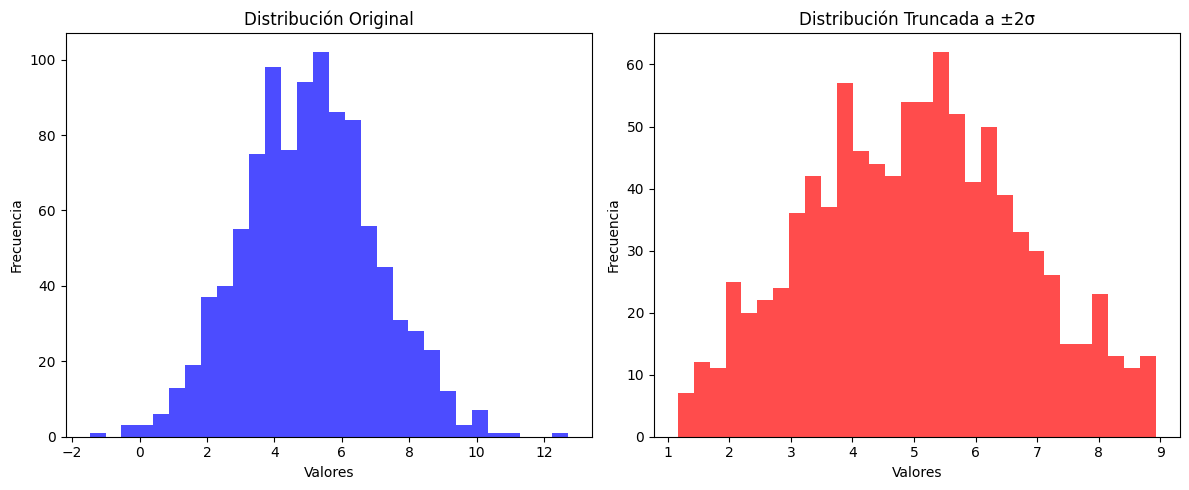

In [12]:
# Calcular mu (media) y sigma (desviación estándar) a partir de los datos
mu = np.mean(datos)  # Media de los datos
sigma = np.std(datos)  # Desviación estándar de los datos

# Calcular límites de truncamiento en función de σ
limite_inferior_sigma = mu - 2 * sigma  # Truncar a 2σ por debajo de la media
limite_superior_sigma = mu + 2 * sigma  # Truncar a 2σ por encima de la media

# Aplicar truncamiento
datos_truncados_sigma = datos[(datos >= limite_inferior_sigma) & (datos <= limite_superior_sigma)]

# Graficar la distribución original y la truncada
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(datos, bins=30, color='blue', alpha=0.7, label="Original")
plt.title("Distribución Original")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(datos_truncados_sigma, bins=30, color='red', alpha=0.7, label="Truncada")
plt.title(f"Distribución Truncada a ±2σ")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

#### 3. *Truncamiento en percentiles*: 
   - Se usan percentiles (por ejemplo, el percentil 10 y 90) para definir los límites de truncamiento. Este método es útil cuando se quiere eliminar los valores extremos de la distribución.

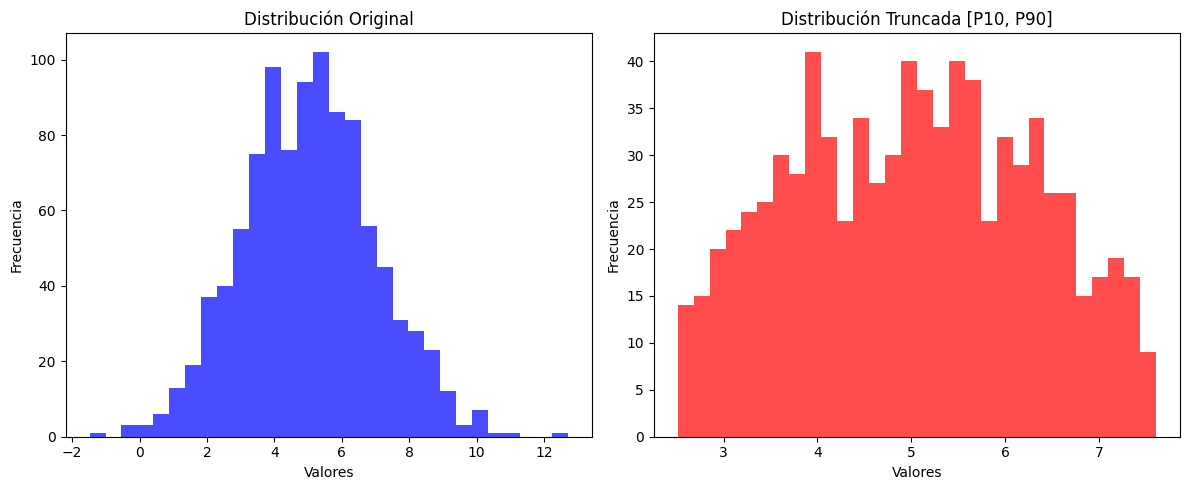

In [13]:
# Calcular percentiles (por ejemplo, percentil 10 y 90)
percentil_10 = np.percentile(datos, 10)
percentil_90 = np.percentile(datos, 90)

# Aplicar truncamiento
datos_truncados_percentiles = datos[(datos >= percentil_10) & (datos <= percentil_90)]

# Graficar la distribución original y la truncada
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(datos, bins=30, color='blue', alpha=0.7, label="Original")
plt.title("Distribución Original")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(datos_truncados_percentiles, bins=30, color='red', alpha=0.7, label="Truncada")
plt.title(f"Distribución Truncada [P10, P90]")
plt.xlabel("Valores")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# 2. ¿Para qué sirve una distribución truncada?

Una **distribución truncada** es una distribución de probabilidad que se deriva de otra distribución, pero cuyos valores están limitados a un rango específico. En otras palabras, es una distribución en la que se "trunca" o recorta una parte de la distribución original, eliminando valores fuera de un intervalo definido.

Por ejemplo, si tienes una distribución normal \( X \sim N(\mu, \sigma^2) \), pero solo estás interesado en los valores de \( X \) que caen entre \( a \) y \( b \), entonces la distribución truncada de \( X \) en el intervalo \([a, b]\) es una versión modificada de la distribución original, donde los valores fuera de \([a, b]\) se descartan y la probabilidad se redistribuye dentro de ese intervalo.

La función de densidad de probabilidad (PDF) de una distribución truncada se define como:

$$
f_{X|a \leq X \leq b}(x) = \frac{f_X(x)}{F_X(b) - F_X(a)}
$$

donde:

- \( f_X(x) \) es la PDF de la distribución original.
- \( F_X(x) \) es la función de distribución acumulativa (CDF) de la distribución original.
- El denominador \( F_X(b) - F_X(a) \) asegura que la PDF truncada integre a 1 sobre el intervalo \([a, b]\).

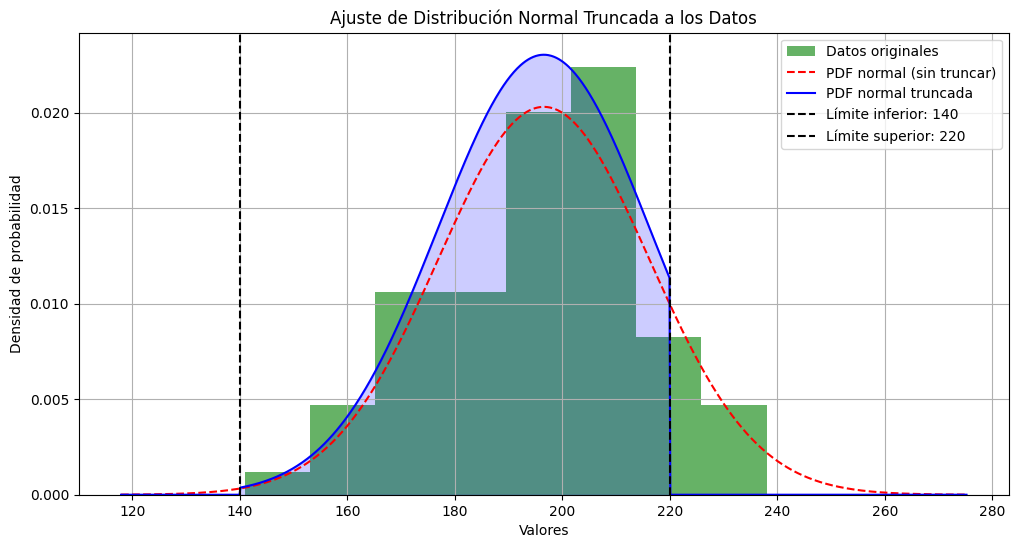

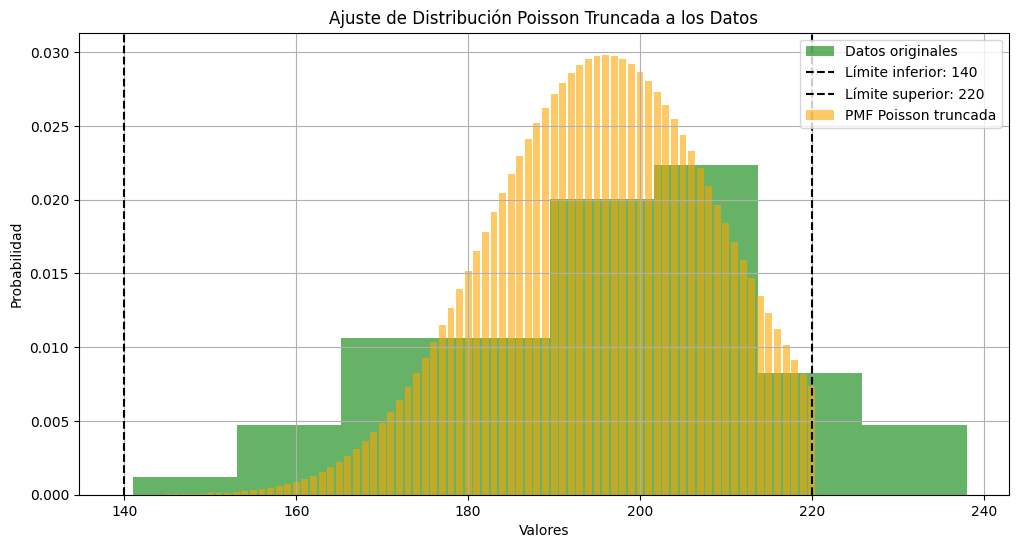

Media de la distribución normal truncada: 192.33
Varianza de la distribución normal truncada: 258.06
Media de la distribución Poisson truncada: 195.12
Varianza de la distribución Poisson truncada: 159.19


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm, poisson, norm
import pandas as pd

# Cargar datos
datos = pd.read_excel('Datos.xlsx')

# Suponiendo que la primera columna contiene los datos
valores = datos.iloc[:, 0].dropna()

# Parámetros de la distribución normal original (estimados desde los datos)
mu = np.mean(valores)  # Media de los datos
sigma = np.std(valores)  # Desviación estándar de los datos

# Límites de truncamiento
a = 140
b = 220

# Crear la distribución normal truncada
dist_truncada_normal = truncnorm(
    (a - mu) / sigma,  # Límite inferior estandarizado
    (b - mu) / sigma,  # Límite superior estandarizado
    loc=mu,            # Media
    scale=sigma        # Desviación estándar
)

# Crear la distribución normal original (sin truncar)
dist_normal = norm(loc=mu, scale=sigma)

# Ajustar una distribución de Poisson a los datos
lambda_ = np.mean(valores)  # Parámetro de la distribución Poisson
dist_poisson = poisson(mu=lambda_)

# Truncar la distribución de Poisson en el rango [a, b]
x_poisson = np.arange(a, b + 1)  # Valores discretos en el rango [a, b]
pmf_poisson = dist_poisson.pmf(x_poisson)  # PMF truncada
pmf_poisson /= np.sum(pmf_poisson)  # Normalizar para que sume 1

# Generar muestras de ambas distribuciones truncadas
muestras_truncadas_normal = dist_truncada_normal.rvs(size=1000)
muestras_truncadas_poisson = np.random.choice(x_poisson, size=1000, p=pmf_poisson)

# Calcular la PDF de la distribución normal truncada y la normal original
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)  # Rango amplio para visualización
pdf_truncada_normal = dist_truncada_normal.pdf(x)
pdf_normal = dist_normal.pdf(x)

# Graficar la PDF de la distribución normal truncada, la normal original y el histograma de los datos
plt.figure(figsize=(12, 6))

# Histograma de los datos originales (usando Sturges)
sturges_bins = int(np.ceil(1 + np.log2(len(valores))))
plt.hist(valores, bins=sturges_bins, density=True, alpha=0.6, color="green", label="Datos originales")

# PDF de la distribución normal original
plt.plot(x, pdf_normal, label="PDF normal (sin truncar)", color="red", linestyle="--")

# PDF de la distribución normal truncada
plt.plot(x, pdf_truncada_normal, label="PDF normal truncada", color="blue")
plt.fill_between(x, pdf_truncada_normal, alpha=0.2, color="blue")

# Líneas verticales para los límites de truncamiento
plt.axvline(a, color="black", linestyle="--", label=f"Límite inferior: {a}")
plt.axvline(b, color="black", linestyle="--", label=f"Límite superior: {b}")

# Configuración del gráfico
plt.title("Ajuste de Distribución Normal Truncada a los Datos")
plt.xlabel("Valores")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)
plt.show()

# Graficar la PMF de la distribución de Poisson truncada y el histograma de los datos
plt.figure(figsize=(12, 6))

# Histograma de los datos originales (usando Sturges)
plt.hist(valores, bins=sturges_bins, density=True, alpha=0.6, color="green", label="Datos originales")

# PMF de la distribución de Poisson truncada
plt.bar(x_poisson, pmf_poisson, alpha=0.6, color="orange", label="PMF Poisson truncada")

# Líneas verticales para los límites de truncamiento
plt.axvline(a, color="black", linestyle="--", label=f"Límite inferior: {a}")
plt.axvline(b, color="black", linestyle="--", label=f"Límite superior: {b}")

# Configuración del gráfico
plt.title("Ajuste de Distribución Poisson Truncada a los Datos")
plt.xlabel("Valores")
plt.ylabel("Probabilidad")
plt.legend()
plt.grid(True)
plt.show()

# Estadísticas básicas
media_truncada_normal = dist_truncada_normal.mean()
varianza_truncada_normal = dist_truncada_normal.var()

media_truncada_poisson = np.sum(x_poisson * pmf_poisson)
varianza_truncada_poisson = np.sum((x_poisson - media_truncada_poisson) ** 2 * pmf_poisson)

print(f"Media de la distribución normal truncada: {media_truncada_normal:.2f}")
print(f"Varianza de la distribución normal truncada: {varianza_truncada_normal:.2f}")
print(f"Media de la distribución Poisson truncada: {media_truncada_poisson:.2f}")
print(f"Varianza de la distribución Poisson truncada: {varianza_truncada_poisson:.2f}")

# <center>3. Estimación de Parámetros en Modelos Truncados</center>

Cuando trabajamos con datos truncados, **NO podemos usar métodos tradicionales** como la media y la desviación estándar directamente, ya que los valores fuera del rango truncado no están presentes en la muestra. Esto introduce un sesgo en la estimación de parámetros.

### 3.1. Librerias utilizadas

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import scipy.optimize as opt
import scipy.stats as stats

### 3.2. Métodos para la Estimación de Parámetros

#### 3.2.1. Metodo de Maxima Verosimilitud (MLE)
Es un método estadístico que encuentra los parámetros que maximizan la probabilidad de observar los datos dados. Se basa en la función de verosimilitud, que mide qué tan probable es obtener los datos observados para diferentes valores de los parámetros del modelo.

Función de estimacion por el método de maxima verosimilitud

In [18]:
def log_likelihood(params, data, a, b):
  mu, sigma = params
  if sigma <= 0:
    return np.inf  # Penalización por valores no válidos

  ll = np.sum(stats.truncnorm.logpdf(
    data, (a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma
  ))
  return -ll  # Se minimiza la función negativa

#### 3.2.2. Método de Momentos (MoM)
El método de momentos es otra opción para estimar los parámetros de una distribución. En este caso, igualamos los momentos teóricos de la distribución truncada con los momentos muestrales y resolvemos para los parámetros desconocidos.

Función de estimacion por el método de momentos

In [19]:
def moments_equations(params, data, a, b):
  mu, sigma = params
  alpha, beta = (a - mu) / sigma, (b - mu) / sigma
  Z = stats.norm.cdf(beta) - stats.norm.cdf(alpha)
  mean_theoretical = mu + (stats.norm.pdf(alpha) - stats.norm.pdf(beta)) * sigma / Z
  var_theoretical = sigma**2 * (1 + (alpha * stats.norm.pdf(alpha) - beta * stats.norm.pdf(beta)) / Z - ((stats.norm.pdf(alpha) - stats.norm.pdf(beta)) / Z) ** 2)
  return [np.mean(data) - mean_theoretical, np.var(data) - var_theoretical]

#### 3.2.3. Método de Inferencia Bayesiana
El método de Inferencia Bayesiana permite estimar los parámetros incorporando una distribución previa sobre ellos y actualizándola con los datos observados.

Función de estimacion por el método de Inferencia Bayesiana

In [20]:
def bayesian_inference(data, a, b):
  # Asegurar que no se modifiquen los datos originales
  data_copy = np.copy(data)

  with pm.Model() as model:
    mu = pm.Normal("mu", mu=5, sigma=2)  # Prior para mu
    sigma = pm.HalfNormal("sigma", sigma=2)  # Prior para sigma

    # Distribución truncada para los datos
    likelihood = pm.TruncatedNormal("likelihood", mu=mu, sigma=sigma, lower=a, upper=b, observed=data_copy)

    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

  mu_est_bayes = trace.posterior["mu"].mean().item()
  sigma_est_bayes = trace.posterior["sigma"].mean().item()

  return mu_est_bayes, sigma_est_bayes, trace

Como el metodo bayesiano es muy pesado computacionalmente, se puso un condicional si se desea ejecutar o no este metodo

In [21]:
usar_metodo_bayesiano = False

### 3.3. Comparación Metodos para la estimacion de parámetros

#### 3.3.1. Generar datos simulados de una distribución normal truncada

In [22]:
# Semilla para reproducibilidad
np.random.seed(42)

# límites de truncamiento
a, b = 0, 10

# parámetros reales
mu_real, sigma_real = 5, 1.5

# datos generados
data = stats.truncnorm.rvs(
    (a - mu_real) / sigma_real, (b - mu_real) / sigma_real,
    loc=mu_real, scale=sigma_real, size=1000
)

#### 3.3.2. Estimación por Máxima Verosimilitud

In [23]:
initial_guess = [np.mean(data), np.std(data)]
result = opt.minimize(log_likelihood, initial_guess, args=(data, a, b))
mu_est_mle, sigma_est_mle = result.x

#### 3.3.3. Estimación por el Método de Momentos

In [24]:
mom_result = opt.root(moments_equations, initial_guess, args=(data, a, b))
mu_est_mom, sigma_est_mom = mom_result.x

#### 3.3.4. Estimación por el Método de Inferencia Bayesiana

In [25]:
if usar_metodo_bayesiano:
  mu_est_bayes, sigma_est_bayes, trace = bayesian_inference(data, a, b)
else:
  print("No se ha realizado inferencia bayesiana")

No se ha realizado inferencia bayesiana


#### 3.3.5. Comparación con los coeficientes verdaderos

In [26]:
print(f"Parámetros reales: mu = {mu_real}, sigma = {sigma_real}")
print(f"Estimaciones MLE: mu = {mu_est_mle:.4f}, sigma = {sigma_est_mle:.4f}")
print(f"Estimaciones MoM: mu = {mu_est_mom:.4f}, sigma = {sigma_est_mom:.4f}")

if usar_metodo_bayesiano:
  print(f"Estimaciones Bayes: mu = {mu_est_bayes:.4f}, sigma = {sigma_est_bayes:.4f}")
else:
  print("Estimaciones Bayes: No calculadas")

Parámetros reales: mu = 5, sigma = 1.5
Estimaciones MLE: mu = 4.9518, sigma = 1.4980
Estimaciones MoM: mu = 4.9518, sigma = 1.4980
Estimaciones Bayes: No calculadas


#### 3.3.6. Visualización de la distribución

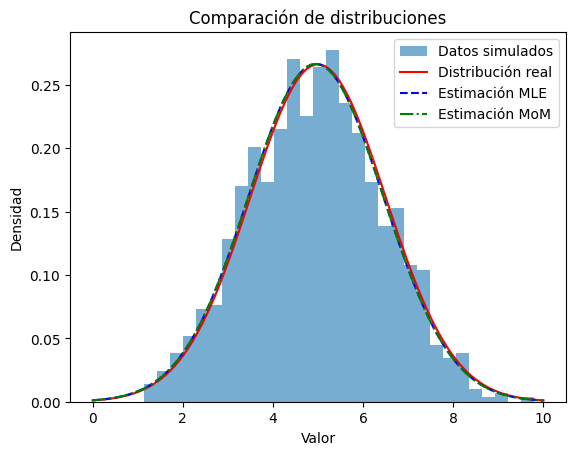

In [27]:
x = np.linspace(a, b, 100)
real_pdf = stats.truncnorm.pdf(x, (a - mu_real) / sigma_real, (b - mu_real) / sigma_real, loc=mu_real, scale=sigma_real)
est_pdf_mle = stats.truncnorm.pdf(x, (a - mu_est_mle) / sigma_est_mle, (b - mu_est_mle) / sigma_est_mle, loc=mu_est_mle, scale=sigma_est_mle)
est_pdf_mom = stats.truncnorm.pdf(x, (a - mu_est_mom) / sigma_est_mom, (b - mu_est_mom) / sigma_est_mom, loc=mu_est_mom, scale=sigma_est_mom)

if usar_metodo_bayesiano:
  est_pdf_bayes = stats.truncnorm.pdf(x, (a - mu_est_bayes) / sigma_est_bayes, (b - mu_est_bayes) / sigma_est_bayes, loc=mu_est_bayes, scale=sigma_est_bayes)

plt.hist(data, bins=30, density=True, alpha=0.6, label="Datos simulados")
plt.plot(x, real_pdf, 'r-', label="Distribución real")
plt.plot(x, est_pdf_mle, 'b--', label="Estimación MLE")
plt.plot(x, est_pdf_mom, 'g-.', label="Estimación MoM")

if usar_metodo_bayesiano:
  plt.plot(x, est_pdf_bayes, 'm:', label="Estimación Bayesiana")

plt.legend()
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.title("Comparación de distribuciones")
plt.show()

### 3.4. Conclusion

*Resultados*

**Parámetros reales:** `mu = 5, sigma = 1.5`

**Estimaciones MLE:** `mu = 4.9518, sigma = 1.4980`

**Estimaciones MoM:** `mu = 4.9518, sigma = 1.4980`

**Estimaciones Bayes:** `mu = 4.9524, sigma = 1.5006`

En este caso, los métodos de **Máxima Verosimilitud (MLE)** y **Método de Momentos (MoM)** arrojaron exactamente los mismos valores para los parámetros estimados, mu (μ) y sigma (𝜎), lo que indica que ambos métodos fueron igualmente efectivos en la recuperación de los valores reales.

Por otro lado, la **Inferencia Bayesiana** también obtuvo estimaciones muy cercanas a los valores verdaderos, con una ligera mejora en la precisión. Sin embargo, la diferencia con respecto a MLE y MoM no fue significativa en este escenario.

En términos generales, *MLE es el método más utilizado debido a su eficiencia y buenas propiedades estadísticas*. No obstante, la Inferencia Bayesiana es una alternativa poderosa cuando se desea incorporar información previa o cuando la incertidumbre en la estimación es un factor clave, aunque suele requerir más tiempo de cómputo.